In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats 

import missingno as msno 
plt.style.use('seaborn') 

import warnings 
warnings.filterwarnings("ignore") 

mpl.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

#Import & Data check
#기본적인 모듈 import

In [2]:
df_train = pd.read_csv("train.csv", parse_dates = ["datetime"]) 
df_test = pd.read_csv("test.csv", parse_dates = ["datetime"])
#csv 파일을 불러오고 Parse_dates: 날짜, 시간변수를 datetime 변수로 변환

In [3]:
df_test.head()
'''
◻︎ datetime - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)

◻︎ season - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현

◻︎ holiday - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아님

◻︎ workingday - 근무일. 1이면 근무일이며, 0이면 근무일이 아님

◻︎ weather

1: 아주 맑은 날씨, 또는 아주 약간의 구름이 끼어있음.

2: 약간의 안개와 구름이 끼어있는 날씨

3: 약간의 눈, 비가 오거나 천둥이 침.

4: 아주 많은 비가 오거나 우박이 내림.

◻︎ temp - 온도, 섭씨(Celsius)

◻︎ atemp - 체감 온도, 섭씨(Celsius)

◻︎ humidity - 습도.

◻︎ windspeed - 풍속.

◻︎ casual - 비회원(non-registered)의 자전거 대여량.

◻︎ registered - 회원(registered)의 자전거 대여량.

◻︎ count - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일
'''

'\n◻︎ datetime - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)\n\n◻︎ season - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현\n\n◻︎ holiday - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아님\n\n◻︎ workingday - 근무일. 1이면 근무일이며, 0이면 근무일이 아님\n\n◻︎ weather\n\n1: 아주 맑은 날씨, 또는 아주 약간의 구름이 끼어있음.\n\n2: 약간의 안개와 구름이 끼어있는 날씨\n\n3: 약간의 눈, 비가 오거나 천둥이 침.\n\n4: 아주 많은 비가 오거나 우박이 내림.\n\n◻︎ temp - 온도, 섭씨(Celsius)\n\n◻︎ atemp - 체감 온도, 섭씨(Celsius)\n\n◻︎ humidity - 습도.\n\n◻︎ windspeed - 풍속.\n\n◻︎ casual - 비회원(non-registered)의 자전거 대여량.\n\n◻︎ registered - 회원(registered)의 자전거 대여량.\n\n◻︎ count - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일\n'

In [4]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot:>

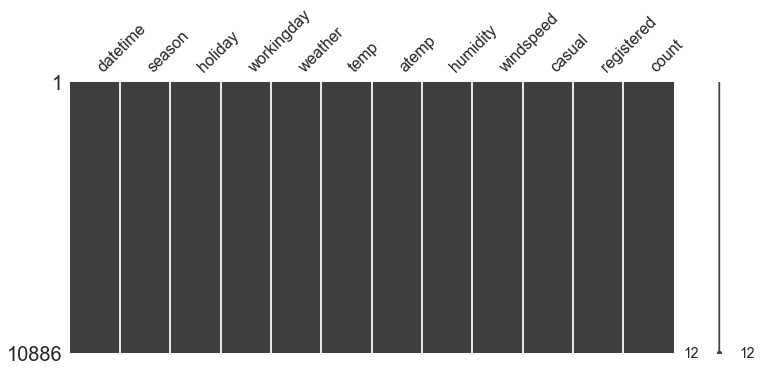

In [5]:
msno.matrix(df_train, figsize=(12,5)) 
#missingno의 matrix를 이용하여 시각화(결측값 x)

Skewness: 1.242066
Kurtosis: 1.300093


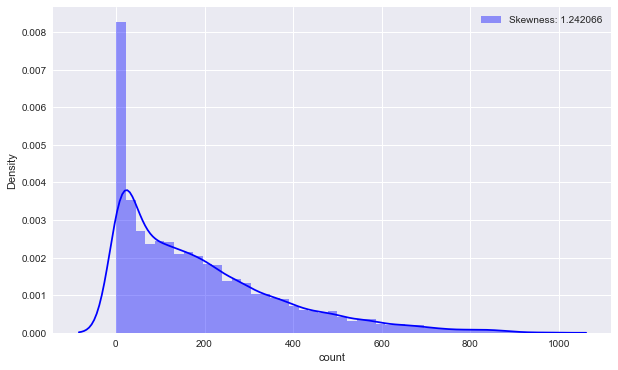

In [6]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df_train["count"], color = "b", label="Skewness: {:2f}".format(df_train["count"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % df_train["count"].skew()) 
print("Kurtosis: %f" % df_train["count"].kurt())

#타겟변수인 count의 Skewness와 Kurtosis (첨도&왜도)를 확인
#count 대부분의 데이터가 0에 몰려있는 모습을 확인.

In [7]:
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second 

df_test["year"] = df_test["datetime"].dt.year 
df_test["month"] = df_test["datetime"].dt.month 
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour 
df_test["minute"] = df_test["datetime"].dt.minute
df_test["second"] = df_test["datetime"].dt.second

df_train.shape

#datetime 변수를 편하게 알아보기 위해 년, 월, 일, 시, 분, 초 단위로 나눠주는 과정

(10886, 18)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

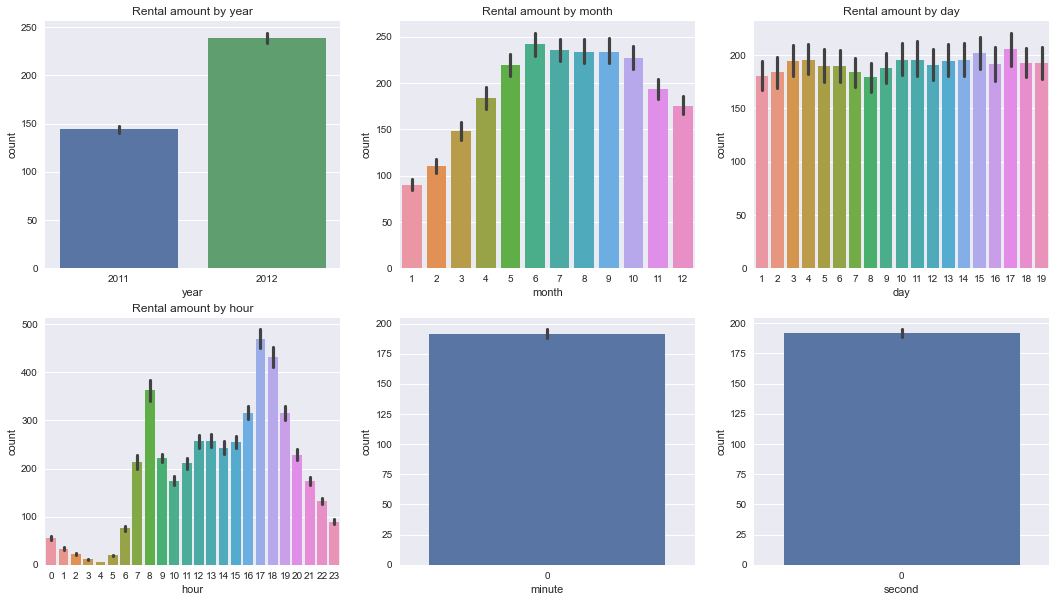

In [8]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=df_train, x = "year", y = "count", ax = ax1) 
sns.barplot(data=df_train, x = "month", y = "count", ax = ax2) 
sns.barplot(data=df_train, x = "day", y = "count", ax = ax3)
sns.barplot(data=df_train, x = "hour", y = "count", ax = ax4)
sns.barplot(data=df_train, x = "minute", y = "count", ax = ax5)
sns.barplot(data=df_train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year") 
ax2.set(ylabel = "count", title = "Rental amount by month") 
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

#각종 시각화 툴을 사용하여 데이터들을 자세히 살펴보고 Feature들 간의 관계 파악
#먼저 barplot을 사용하여 시각화
#minute 과 second는 데이터가 없기도 하고 있다고해도 영향이 적음.
#2011년보다 2012년에 대여량이 증가하였고 날씨가 추운날보다 5월 - 10월 대여량이 많음
#날짜별(day) 균일 (데이터 분석에는 부적절)
#시간별로는(hour) 출, 퇴근 시간에 대여량이 증가하는 것을 도출.



In [9]:
df_train["dayofweek"] = df_train["datetime"].dt.dayofweek
df_test["dayofweek"] = df_test["datetime"].dt.dayofweek

df_train.shape

#요일변수 추가 생성

(10886, 19)

In [10]:
df_train['dayofweek'].value_counts()

#0 = 월요일 ~ 6 = 일요일
#큰 차이는 없지만 5,6(주말)의 대여량이 조금 더 많아 workingday boxplot내용과 어느정도 일치

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

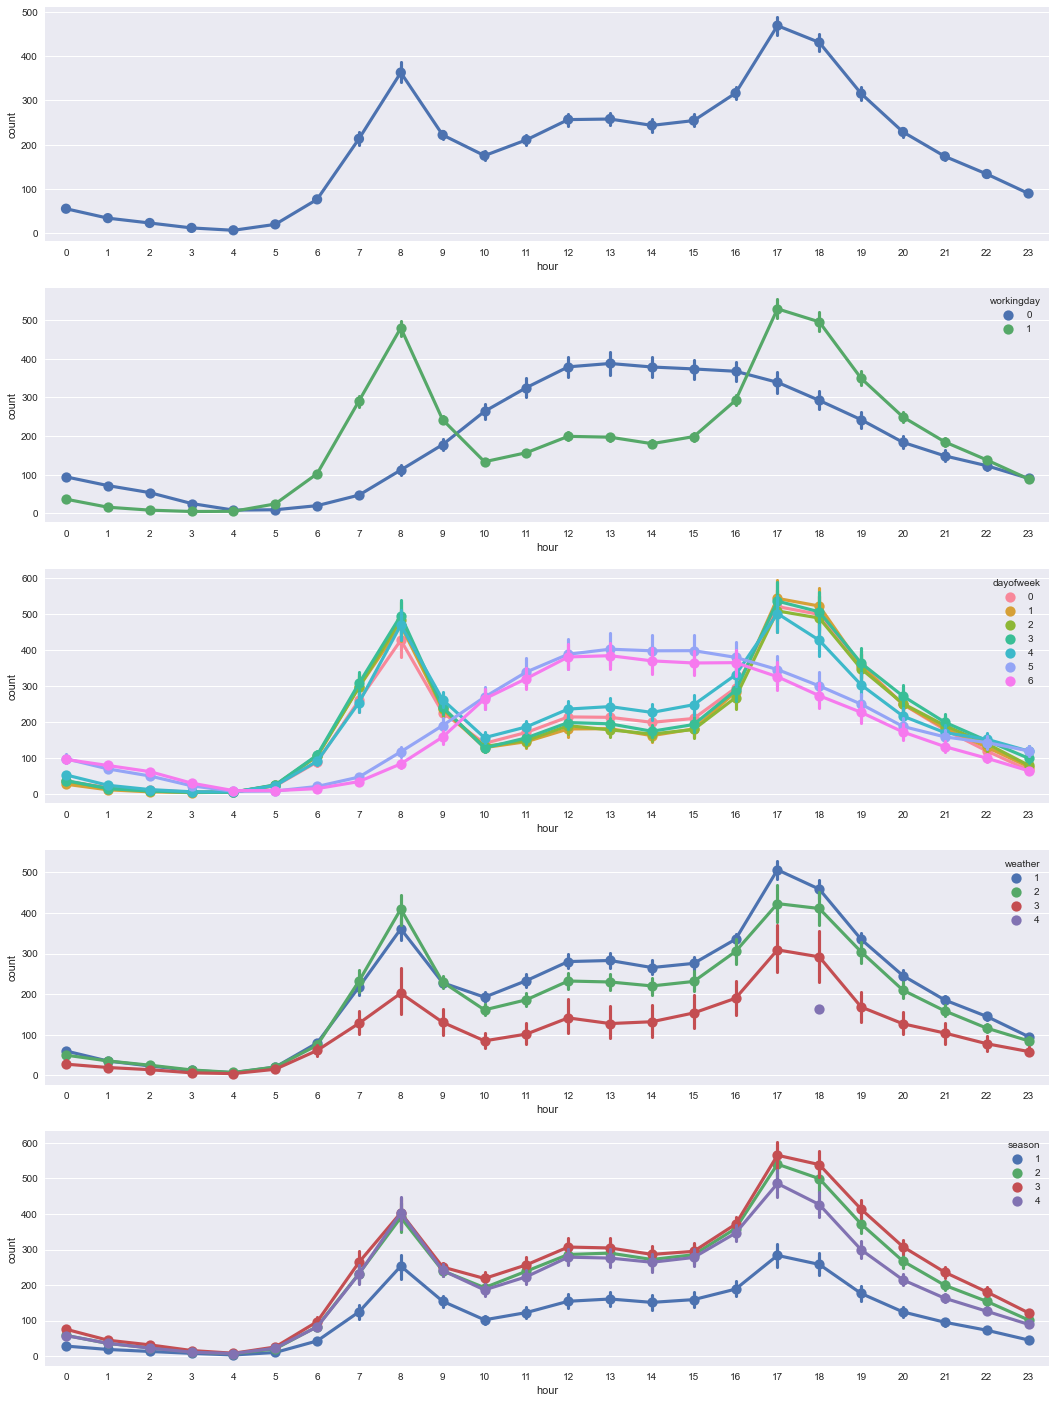

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = df_train, x = "hour", y = "count", ax = ax1) 
#앞서 보았던 결과들과 일치

sns.pointplot(data = df_train, x = "hour", y = "count", hue = "workingday", ax = ax2)
#쉬는날에는 오전부터 대여률이 상승했다가 저녁이 다가오면 대여률이 하강
#반면, 일하는 날에는 출퇴근 시간에 대여률이 높음

sns.pointplot(data = df_train, x = "hour", y = "count", hue = "dayofweek", ax = ax3) 
#토, 일 낮시간에는 평이하고, 나머지 요일은 출퇴근 시간 집중

sns.pointplot(data = df_train, x = "hour", y = "count", hue = "weather", ax = ax4)
#맑은 날이 가장 높은 대여량, 안개 - 가벼운 눈비 순으로 대여량이 많음.
#악천후는 거의 없다고 봐도 됨.

sns.pointplot(data = df_train, x = "hour", y = "count", hue = "season", ax = ax5)
#봄이 가장 적으며, 여름 가을 겨울은 조금씩 차이

'\n수치형 데이터들의 상관관계를 알아보기위해 Heatmap 생성\n\ncount의 열을 보면 가장 눈에 띄게 진한 변수는 registered(회원)이다.\n\n따라서, registered가 count와 가장 연관이 깊다.\n\nregistered는 test데이터엔 존재하지 않는다.\n\n그 다음으로 상관계수가 높은 변수는 casual(비회원)이다.\n\n온도, 습도, 풍속은 거의 관계가 없다고 볼 수 있다.\n\n \n\ntemp와 atemp는 온도, 체감온도인데 상관계수가 매우 높은걸로 봐서 다중공선성을 보인다고 할 수 있다.\n'

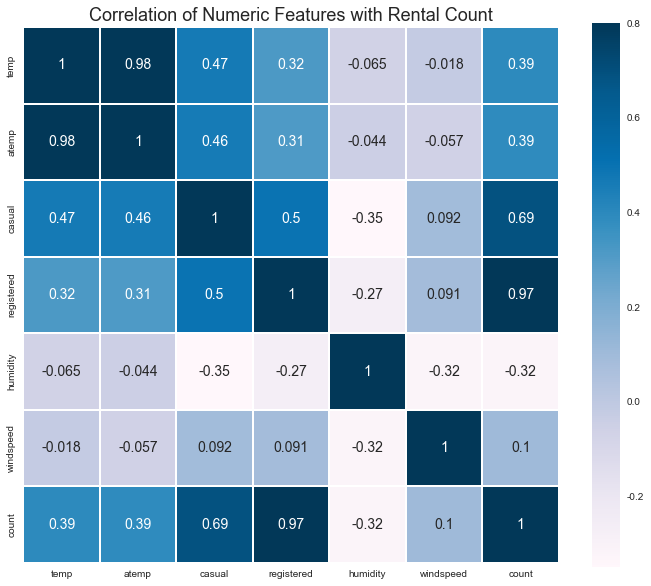

In [12]:
corr_data = df_train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]] 

colormap = plt.cm.PuBu 



f , ax = plt.subplots(figsize = (12,10)) 
plt.title('Correlation of Numeric Features with Rental Count',y=1,size=18)
sns.heatmap(corr_data.corr(), vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",annot_kws = {'size':14})

'''
수치형 데이터들의 상관관계를 알아보기위해 Heatmap 생성

count의 열을 보면 가장 눈에 띄게 진한 변수는 registered(회원)이다.

따라서, registered가 count와 가장 연관이 깊다.

registered는 test데이터엔 존재하지 않는다.

그 다음으로 상관계수가 높은 변수는 casual(비회원)이다.

온도, 습도, 풍속은 거의 관계가 없다고 볼 수 있다.

 

temp와 atemp는 온도, 체감온도인데 상관계수가 매우 높은걸로 봐서 다중공선성을 보인다고 할 수 있다.
'''

'\nHeatmap을 통해 유의하지 않다고 판단된 변수는 Scatterplot을 그려보면,\n\nwindspeed의 경우 0에 많은 데이터가 몰려있는걸 확인 할 수 있다.  \n\n일반적으로 풍속이 0인 경우가 흔치 않으므로 Null데이터를 0으로 대체한게 아닌가 생각해볼 수 있다.\n'

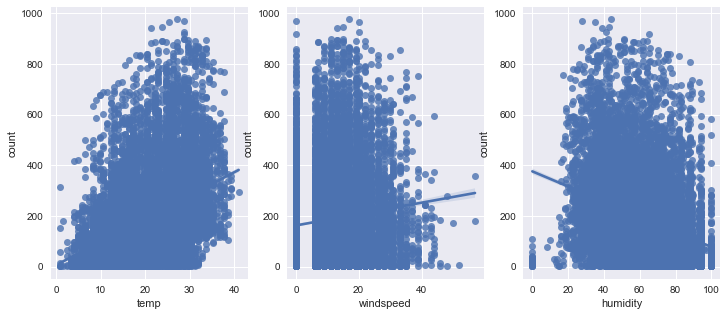

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

temp_scatter_plot = pd.concat([df_train['count'],df_train['temp']],axis = 1)
sns.regplot(x='temp',y = 'count',data = temp_scatter_plot,scatter= True, fit_reg=True, ax=ax1) 

windspeed_scatter_plot = pd.concat([df_train['count'],df_train['windspeed']],axis = 1) 
sns.regplot(x='windspeed',y = 'count',data = windspeed_scatter_plot,scatter= True, fit_reg=True, ax=ax2) 

humidity_scatter_plot = pd.concat([df_train['count'],df_train['humidity']],axis = 1)
sns.regplot(x='humidity',y = 'count',data = humidity_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

'''
Heatmap을 통해 유의하지 않다고 판단된 변수는 Scatterplot을 그려보면,

windspeed의 경우 0에 많은 데이터가 몰려있는걸 확인 할 수 있다.  

일반적으로 풍속이 0인 경우가 흔치 않으므로 Null데이터를 0으로 대체한게 아닌가 생각해볼 수 있다.
'''

'\n위에서 살펴본 scatter plot의 결과를 알아보기 위해 windspeed에 대한 자세한 시각화를 해주면\n0에대한 값이 매우 많은걸 확인할 수 있다.\n'

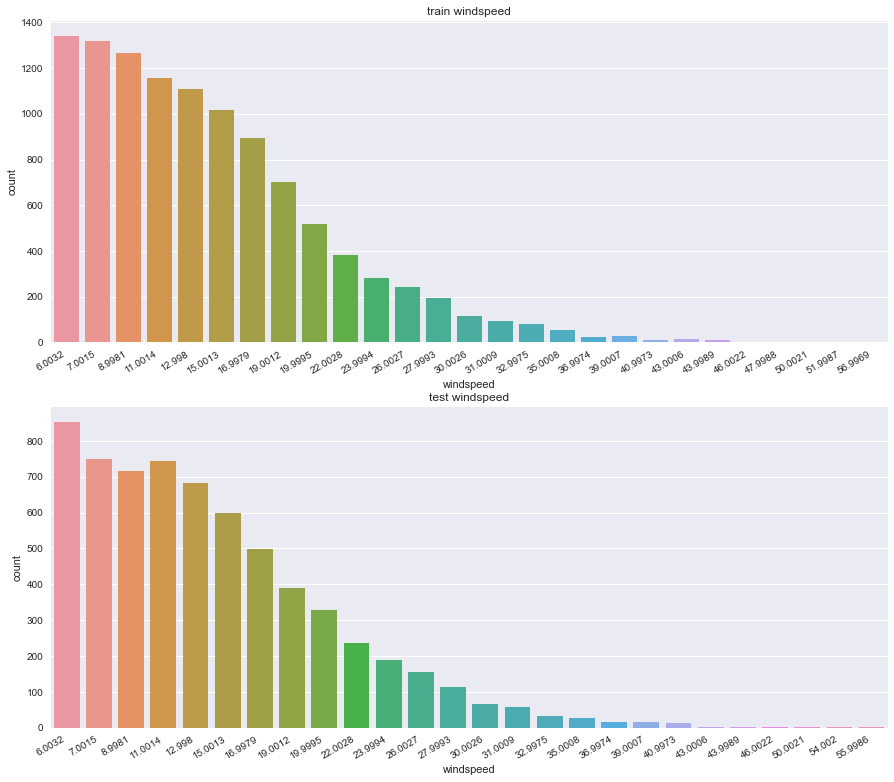

In [35]:
fig, axes = plt.subplots(nrows = 2, figsize = (15,13))

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = "right") 
axes[0].set(ylabel = "count", title = "train windspeed") 
sns.countplot(data = df_train, x = "windspeed", ax = axes[0]) 

plt.sca(axes[1]) 
plt.xticks(rotation = 30, ha = "right")
axes[1].set(ylabel = "count", title = "test windspeed") 
sns.countplot(data = df_test, x = "windspeed", ax = axes[1])
'''
위에서 살펴본 scatter plot의 결과를 알아보기 위해 windspeed에 대한 자세한 시각화를 해주면
0에대한 값이 매우 많은걸 확인할 수 있다.
'''

In [15]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month) 

df_train["year_month"] = df_train["datetime"].apply(concatenate_year_month) 
df_test["year_month"] = df_test["datetime"].apply(concatenate_year_month) 

print(df_train.shape) 
df_train[["datetime", "year_month"]].head()

#연도별 데이터의 대여 변화를 좀더 자세히 보기위해 year와 month 데이터를 붙여준다.

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


'\n2011년에 비해 2012년의 대여량이 높아졌던것을 확인했었는데, \n두 년도를 월별로 시각화하여 좀 더 연속적으로 보면\n\n2012년의 대여량이 대체적으로 높으며, 두 연도 모두 따뜻한 계절의 대여량이 더 높다.\n\n전체적으로 보면 갈수록 대여량이 증가하는 추세이다.\n'

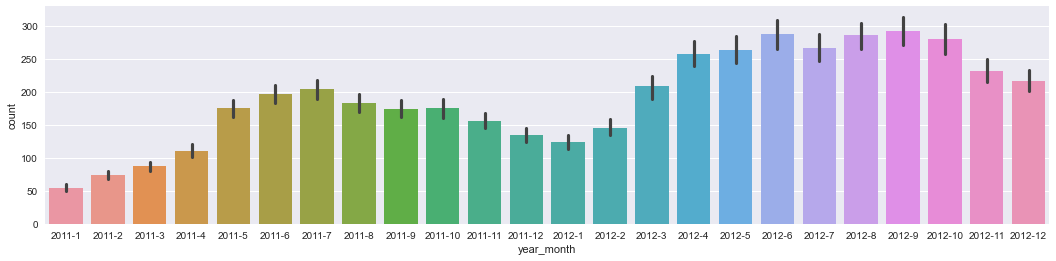

In [16]:
fig, ax = plt.subplots(figsize = (18,4))

sns.barplot(data = df_train, y = "count", x = "year_month")

'''
2011년에 비해 2012년의 대여량이 높아졌던것을 확인했었는데, 
두 년도를 월별로 시각화하여 좀 더 연속적으로 보면

2012년의 대여량이 대체적으로 높으며, 두 연도 모두 따뜻한 계절의 대여량이 더 높다.

전체적으로 보면 갈수록 대여량이 증가하는 추세이다.
'''

In [17]:
from collections import Counter 

def detect_outliers(df, n, features): 
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        
        outlier_step = 1.5 * IQR 
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
    
    return multiple_outliers 

Outliers_to_drop = detect_outliers(df_train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

'''
train 데이터 셋의 이상치를 제거
outlier_list_col = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].index
'''

'\ntrain 데이터 셋의 이상치를 제거\noutlier_list_col = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].index\n'

In [18]:
df_train.loc[Outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3,2012-4
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4,2012-4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3,2012-5
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3,2012-5
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4,2012-5


In [19]:
df_train = df_train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
df_train.shape

#train data set에서 이상치 제거(행의 수가 많이 줄어들었다.)

(10846, 20)

'\n각 변수들을 이용해 Boxplor을 그려주면,\n\n앞서 알아보았던 특징들과 대부분 일치하는 특징을 보여주는 것으로 보인다.\n'

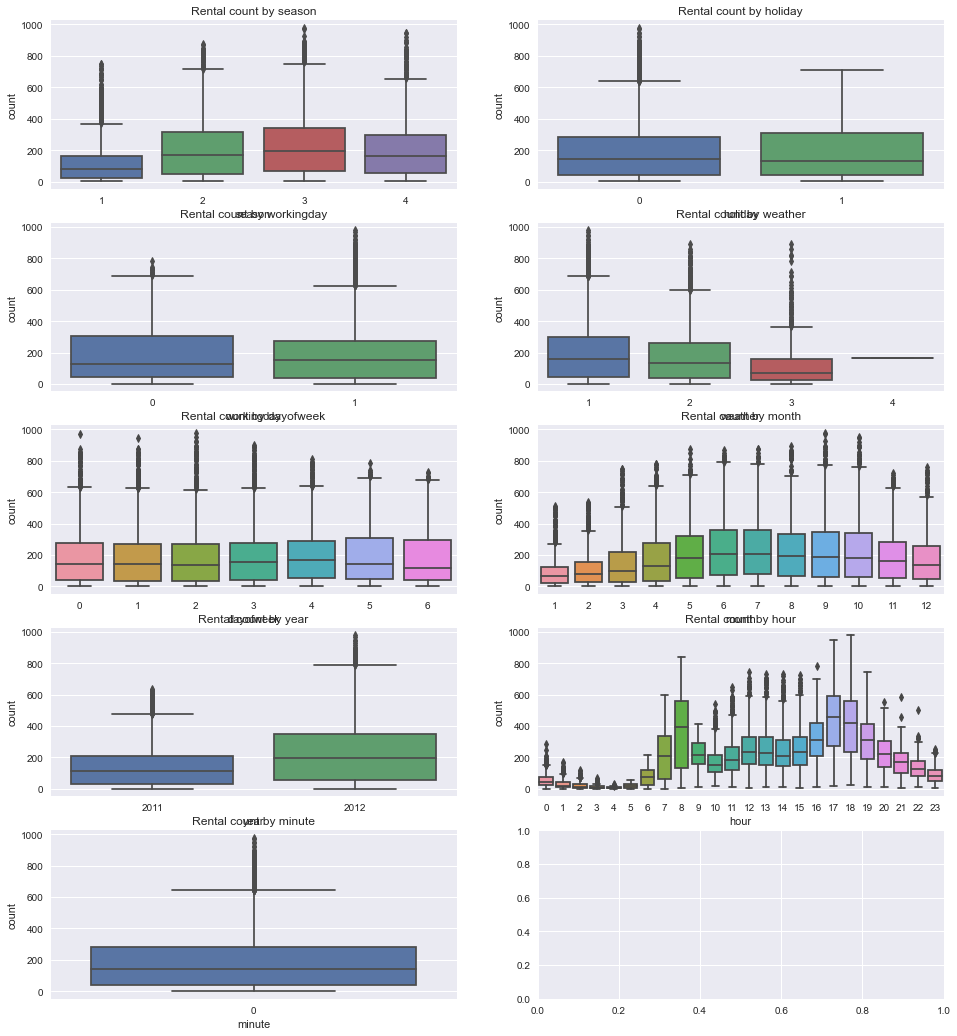

In [20]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18))
sns.boxplot(data = df_train, y="count", x = "season", orient = "v", ax = axes[0][0])
sns.boxplot(data = df_train, y="count", x = "holiday", orient = "v", ax = axes[0][1]) 
sns.boxplot(data = df_train, y="count", x = "workingday", orient = "v", ax = axes[1][0]) 
sns.boxplot(data = df_train, y="count", x = "weather", orient = "v", ax = axes[1][1]) 
sns.boxplot(data = df_train, y="count", x = "dayofweek", orient = "v", ax = axes[2][0]) 
sns.boxplot(data = df_train, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = df_train, y="count", x = "year", orient = "v", ax = axes[3][0]) 
sns.boxplot(data = df_train, y="count", x = "hour", orient = "v", ax = axes[3][1]) 
sns.boxplot(data = df_train, y="count", x = "minute", orient = "v", ax = axes[4][0]) 

axes[0][0].set(ylabel = "count", title = "Rental count by season") 
axes[0][1].set(ylabel = "count", title = "Rental count by holiday") 
axes[1][0].set(ylabel = "count", title = "Rental count by workingday")
axes[1][1].set(ylabel = "count", title = "Rental count by weather") 
axes[2][0].set(ylabel = "count", title = "Rental count by dayofweek") 
axes[2][1].set(ylabel = "count", title = "Rental count by month") 
axes[3][0].set(ylabel = "count", title = "Rental count by year")
axes[3][1].set(ylabel = "count", title = "Rental count by hour")
axes[4][0].set(ylabel = "count", title = "Rental count by minute")

'''
각 변수들을 이용해 Boxplor을 그려주면,

앞서 알아보았던 특징들과 대부분 일치하는 특징을 보여주는 것으로 보인다.
'''

Skewness: 1.210923
Kurtosis: 1.200871


'\n타겟 변수의 첨도와 왜도를 살펴보면,\n수치적으로는 그렇게 큰 차이는 없지만 distplot으로 확인해보니 \n0에 많이 치우친 것을 확인할 수 있다. \n'

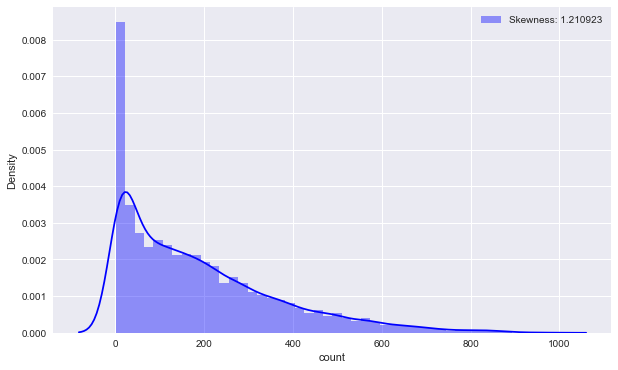

In [21]:
f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(df_train["count"], color = "b", label="Skewness: {:2f}".format(df_train["count"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % df_train["count"].skew()) 
print("Kurtosis: %f" % df_train["count"].kurt())

'''
타겟 변수의 첨도와 왜도를 살펴보면,
수치적으로는 그렇게 큰 차이는 없지만 distplot으로 확인해보니 
0에 많이 치우친 것을 확인할 수 있다. 
'''

Skewness: -0.975198
Kurtosis: 0.247435


'\n타겟변수 count에 Log를 취해주고, 모델에 사용되는 변수의 첨도와 왜도를 확인해준다.\n'

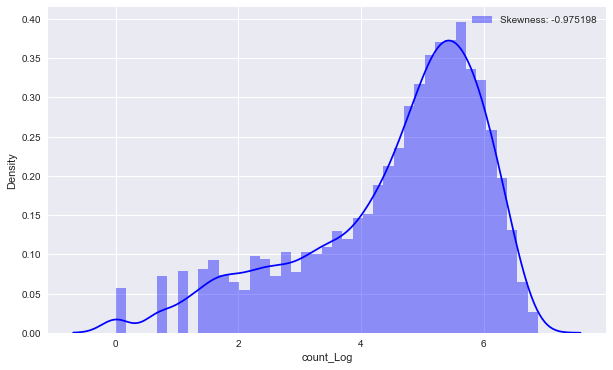

In [22]:
df_train["count_Log"] = df_train["count"].map(lambda i:np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize = (10,6)) 
g = sns.distplot(df_train["count_Log"], color = "b", label="Skewness: {:2f}".format(df_train["count_Log"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % df_train["count_Log"].skew()) 
print("Kurtosis: %f" % df_train["count_Log"].kurt()) 

df_train.drop("count", axis='columns', inplace=True)

'''
타겟변수 count에 Log를 취해주고, 모델에 사용되는 변수의 첨도와 왜도를 확인해준다.
'''

In [23]:
trainWind0 = df_train.loc[df_train["windspeed"] == 0] 
trainWindNot0 = df_train.loc[df_train["windspeed"] != 0]

'''
풍속이 0인 데이터들과 0이 아닌 데이터들로 나눠준다.
EDA과정에서 풍속에 0의 값이 매우 많은 것을 확인하였다.

사실 풍속과 같은 변수들은 상식적으로도 0으로 측정되기 어렵다는 것을 알지만,
가끔 데이터를 보면 어떠한 변수가 0에 굉장히 많이 몰려있는 경우가 있다.

위와 같은 상황에서는 '당연히 풍속이 0일리가 없겠지'하고 조치를 취해줄 수 있겠지만
상황에 따라 잘 판단해야한다. 

실제로 관측된 값이 0일수도 있고, 혹은 관측이 되지 않아서 (결측치) 0으로 채워넣은 값일 수도 있기때문에
풍속은 0으로 관측될 경우가 거의 없을 것이라고 판단하고 0을 어떻게 채워줄지 고민해야한다. 

'''

"\n풍속이 0인 데이터들과 0이 아닌 데이터들로 나눠준다.\nEDA과정에서 풍속에 0의 값이 매우 많은 것을 확인하였다.\n\n사실 풍속과 같은 변수들은 상식적으로도 0으로 측정되기 어렵다는 것을 알지만,\n가끔 데이터를 보면 어떠한 변수가 0에 굉장히 많이 몰려있는 경우가 있다.\n\n위와 같은 상황에서는 '당연히 풍속이 0일리가 없겠지'하고 조치를 취해줄 수 있겠지만\n상황에 따라 잘 판단해야한다. \n\n실제로 관측된 값이 0일수도 있고, 혹은 관측이 되지 않아서 (결측치) 0으로 채워넣은 값일 수도 있기때문에\n풍속은 0으로 관측될 경우가 거의 없을 것이라고 판단하고 0을 어떻게 채워줄지 고민해야한다. \n\n"

In [24]:
from sklearn.ensemble import RandomForestClassifier 

def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0] 
    dataWindNot0 = data.loc[data["windspeed"] != 0] 
    
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"] 
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str") 
    
    rf_wind = RandomForestClassifier() 
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"]) 
    wind0 = rf_wind.predict(X=dataWind0[wcol]) 
    
    predictWind0 = dataWind0 
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0 
    
    data = predictWindNot0.append(predictWind0)
    
    data["windspeed"] = data["windspeed"].astype("float") 
    
    data.reset_index(inplace = True) 
    data.drop("index", inplace = True, axis = 1) 
    
    return data

'''
참고한 커널에서는 prophet이 아닌 머신러닝(RandomForest)으로 예측을 하였다.

풍속이 0인 변수들을 머신러닝 모델을 사용하여 예측하고 예측된 값으로 대체해주는 방법 
RandomForest를 사용하여 예측한 것이다.

먼저 predict_windspeed라는 함수를 정의해주고 

그 후 예측에 사용할 독립변수들을 지정해준다. 

풍속이 날씨에 대한 변수이기 때문에 wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]로 날씨에 관련된 변수들을 예측의 독립변수로 사용한다.

지정해준 독립변수들과 0이 아닌 데이터로 분류했던 windspeed를 RandomForest로 학습시켜준다.

그리고 학습시킨 모델을 통해 0 값을 가졌던 windspeed를 예측한다.

그 후의 코드는 다시 본래의 데이터프레임에 예측된 windspeed를 넣어주는 코드이다.
'''

'\n참고한 커널에서는 prophet이 아닌 머신러닝(RandomForest)으로 예측을 하였다.\n\n풍속이 0인 변수들을 머신러닝 모델을 사용하여 예측하고 예측된 값으로 대체해주는 방법 \nRandomForest를 사용하여 예측한 것이다.\n\n먼저 predict_windspeed라는 함수를 정의해주고 \n\n그 후 예측에 사용할 독립변수들을 지정해준다. \n\n풍속이 날씨에 대한 변수이기 때문에 wcol = ["season", "weather", "humidity", "day", "temp", "atemp"]로 날씨에 관련된 변수들을 예측의 독립변수로 사용한다.\n\n지정해준 독립변수들과 0이 아닌 데이터로 분류했던 windspeed를 RandomForest로 학습시켜준다.\n\n그리고 학습시킨 모델을 통해 0 값을 가졌던 windspeed를 예측한다.\n\n그 후의 코드는 다시 본래의 데이터프레임에 예측된 windspeed를 넣어주는 코드이다.\n'

'\n예측된 값들이 잘 들어갔는지 확인\n\nEDA 때 살펴보았던 windspeed의 countplot은 0에 굉장히 많은 값들이 몰려있었던 것을 확인했지만, \n\n현재 countplot은 모든 값들이 예측값으로 대체되어 0값이 없는 것을 확인할 수 있다.\n'

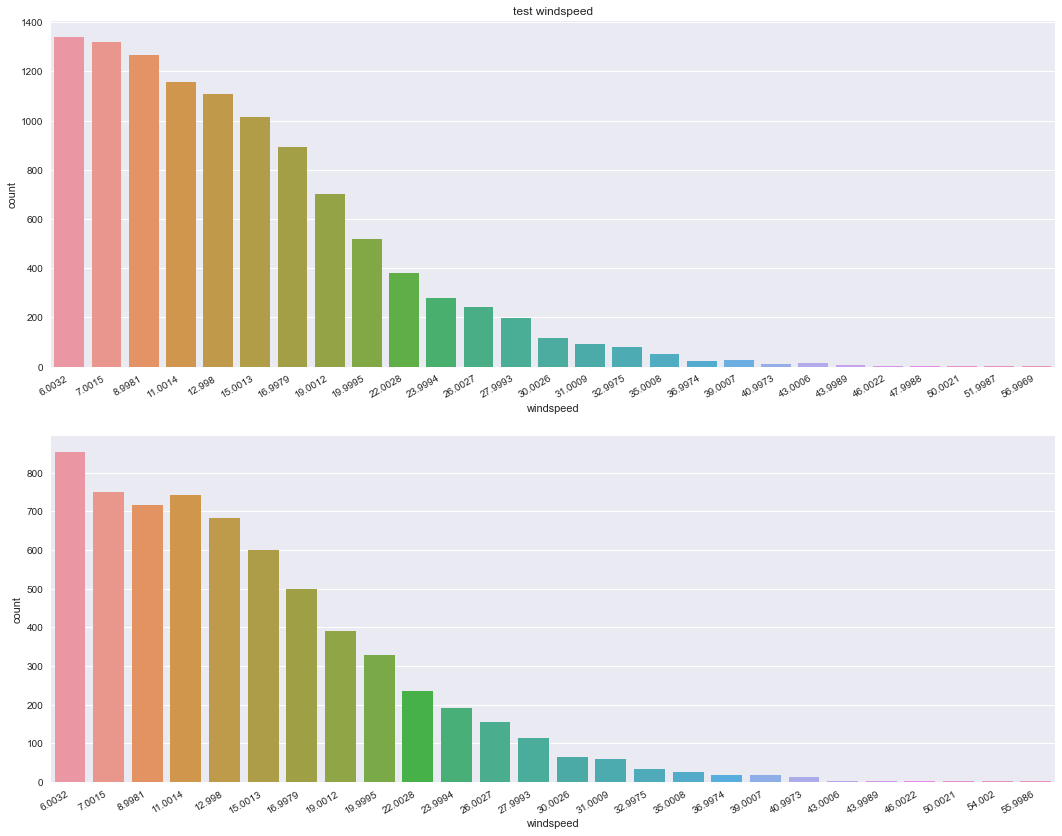

In [25]:
df_train = predict_windspeed(df_train) 
df_test = predict_windspeed(df_test) 

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14)) 

plt.sca(ax1) 
plt.xticks(rotation = 30, ha = "right") 
ax1.set(ylabel = "count", title = "train windspeed") 
sns.countplot(data = df_train, x = "windspeed", ax = ax1) 

plt.sca(ax2)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "test windspeed")
sns.countplot(data = df_test, x = "windspeed", ax = ax2)

'''
예측된 값들이 잘 들어갔는지 확인

EDA 때 살펴보았던 windspeed의 countplot은 0에 굉장히 많은 값들이 몰려있었던 것을 확인했지만, 

현재 countplot은 모든 값들이 예측값으로 대체되어 0값이 없는 것을 확인할 수 있다.
'''

In [26]:
corr_data = df_train[["count_Log", "windspeed"]]
corr_data.corr()
#Log를 취해준 타겟변수(count)와 0값을 채워준 windspeed의 상관계수를 확인

,count_Log,windspeed
count_Log,1.000000,0.126496
windspeed,0.126496,1.000000


In [27]:
df_train = pd.get_dummies(df_train, columns = ["weather"], prefix = "weather") 
df_test = pd.get_dummies(df_test, columns = ["weather"], prefix = "weather") 

df_train = pd.get_dummies(df_train, columns = ["season"], prefix = "season") 
df_test = pd.get_dummies(df_test, columns = ["season"], prefix = "season")

'''
다음으로 Categorical Feature들을 one hot encoding 해주면 

 

여기까지 Feature Engineering 완료 

사실 성능을 높이기 위해 만들 수 있는 파생변수는 여러가지가 있을 수 있다. 

특히 날씨에 관한 변수같은 경우는 여러가지 수식을 활용하면 다양한 검증된 변수를 생성할 수 있다. 
'''

'\n다음으로 Categorical Feature들을 one hot encoding 해주면 \n\n \n\n여기까지 Feature Engineering 완료 \n\n사실 성능을 높이기 위해 만들 수 있는 파생변수는 여러가지가 있을 수 있다. \n\n특히 날씨에 관한 변수같은 경우는 여러가지 수식을 활용하면 다양한 검증된 변수를 생성할 수 있다. \n'

In [28]:
datetime_test = df_test['datetime']
df_train.drop(["datetime", "registered","casual","holiday", "year_month", "minute", "second"], axis = 1, inplace = True) 
df_test.drop(["datetime","holiday", "year_month", "minute", "second"], axis = 1, inplace = True)
#학습에 사용할 train과 test 데이터 셋을 정리

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
X_train = df_train.drop("count_Log", axis = 1).values
target_label = df_train["count_Log"].values
X_test = df_test.values 
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2000)

'''
학습을 위해 train_test_split을 통해 데이터 셋을 학습용과 검증용으로 나눠준다.

타겟 변수인 count_Log를 제외한 나머지 변수를 X_train에, count_Log의 값들을 target_label이라는 변수에 새로 저장 

X_test는 캐글에서 제공되는 테스트 데이터 셋의 값들을 저장 

train_test_split을 통해 학습용과 검증용으로 나누어 주는데 임의로 test_size를 0.2로 지정해주어 검증 데이터 셋을 전체 train데이터 셋의 20%로 지정해준다.
'''

'\n학습을 위해 train_test_split을 통해 데이터 셋을 학습용과 검증용으로 나눠준다.\n\n타겟 변수인 count_Log를 제외한 나머지 변수를 X_train에, count_Log의 값들을 target_label이라는 변수에 새로 저장 \n\nX_test는 캐글에서 제공되는 테스트 데이터 셋의 값들을 저장 \n\ntrain_test_split을 통해 학습용과 검증용으로 나누어 주는데 임의로 test_size를 0.2로 지정해주어 검증 데이터 셋을 전체 train데이터 셋의 20%로 지정해준다.\n'

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05,
                                 max_depth=4,
                                 min_samples_leaf=15, min_samples_split=10, random_state =42) 

regressor.fit(X_tr,y_tr)

'''
이번 커널은 GradientBoosting 모델을 사용해보면 

regressor를 만들어주고 분리해놓았던 학습용 데이터를 통해 학습시켜준다.
'''

'\n이번 커널은 GradientBoosting 모델을 사용해보면 \n\nregressor를 만들어주고 분리해놓았던 학습용 데이터를 통해 학습시켜준다.\n'

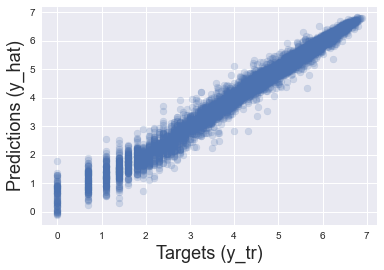

In [31]:
y_hat = regressor.predict(X_tr) 
plt.scatter(y_tr, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)',size=18) 
plt.ylabel('Predictions (y_hat)',size=18) 
plt.show()

#학습용 데이터셋에 얼마나 잘 접합됐는지 확인

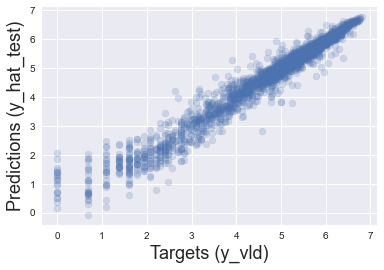

In [32]:
y_hat_test = regressor.predict(X_vld) 
plt.scatter(y_vld, y_hat_test, alpha=0.2) 
plt.xlabel('Targets (y_vld)',size=18) 
plt.ylabel('Predictions (y_hat_test)',size=18) 
plt.show()
#같은 방법으로 검증용 데이터셋도 확인

In [33]:
print(accuracies.mean())
print(accuracies.std())

#정확도 확인

NameError: name 'accuracies' is not defined